# Personal 4 day Python & Data learning project

Data was always something that surrounded my projects at school and work. However it was not until I was asked "What is your favorite data cleansing technique?" that I really took a long hard look at how I interacted with data and my true competency with how I looked at data and how I worked with data. With this recognition in mind, I thus set off on a 4 day journey through Python and machine learning with data having had no prior experience. This is by no means the end of the learning journey but a form of inertia to get the ball rolling with my interest in data.

The Airbnb data set used was from http://insideairbnb.com/about.html
Python tutorials from NYU's data science bootcamp, datacamp.com, and independent online tutorials.

During these five days, my objectives are as follows:
1. Learn how to apply fundamental python on top of merely knowing the syntax
2. Learning about the different packages you could use in Python to deal with data
3. Effective ways to clean data and how to justify my choices in dropping/including data
4. How to identify relevant and interesting relationships to study
5. How to effectively visualize data with Python visualization packages
6. (If time allows) to attempt creating a preliminary predictive model

## Step 1: importing the necessary packages and importing the data

In [1]:
import sys
import datetime
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Here we import the csv files with San Francisco Airbnb listings information that was downloaded from insideairbnb.com

In [2]:
full_df = pd.read_csv('sf_airbnb2017.csv', low_memory=False)
full_df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16570521,https://www.airbnb.com/rooms/16570521,20171002002039,2017-10-02,Lands' End hideaway,Light and airy in-law with dedicated bathroom ...,"The room is on the lower level of the house, w...",Light and airy in-law with dedicated bathroom ...,none,The area around Lincoln Park is a residential ...,...,t,STR-0001287,"{""SAN FRANCISCO""}",f,f,moderate,f,f,2,2.02
1,8001958,https://www.airbnb.com/rooms/8001958,20171002002039,2017-10-02,Ocean and park front panoramic view,This is a classic 1969 building in front of se...,NaN,This is a classic 1969 building in front of se...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",f,f,flexible,f,f,1,NaN
2,8388658,https://www.airbnb.com/rooms/8388658,20171002002039,2017-10-02,Mid-century Seacliff near GG Bridge,Three-bedroom in exclusive Seacliff neighborho...,NaN,Three-bedroom in exclusive Seacliff neighborho...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",f,f,flexible,f,f,1,NaN
3,16064495,https://www.airbnb.com/rooms/16064495,20171002002039,2017-10-02,Charming home with views of the Golden Gate Br...,Welcome to one of the coziest and charming hom...,This house has lots of history! It was origina...,Welcome to one of the coziest and charming hom...,none,Three blocks away on Clement Street are plenty...,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,1,NaN
4,15664146,https://www.airbnb.com/rooms/15664146,20171002002039,2017-10-02,Spacious 3 beds in convenient/safe neighborhood,My home is in one of the safest neighborhoods ...,NaN,My home is in one of the safest neighborhoods ...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",t,t,strict,f,f,1,3.86
5,1427660,https://www.airbnb.com/rooms/1427660,20171002002039,2017-10-02,Charming Studio Apt at Ocean Beach,"NON-SMOKING, charming, private, peaceful hidea...","This NON-SMOKING, quiet and private 1 bedroom ...","NON-SMOKING, charming, private, peaceful hidea...",none,I'm excited for you to discover why I love liv...,...,t,0000026,"{""SAN FRANCISCO""}",t,t,flexible,f,f,1,6.65
6,19745324,https://www.airbnb.com/rooms/19745324,20171002002039,2017-10-02,Super Fabulous Mansion!,Live in a mansion in the Sea Cliff neighborhoo...,This is a very large home in San Francisco's v...,Live in a mansion in the Sea Cliff neighborhoo...,none,"China beach, Lincoln Park, Legion of Honor, Cl...",...,t,NaN,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,2.88
7,18022892,https://www.airbnb.com/rooms/18022892,20171002002039,2017-10-02,Hardly Strictly Bluegrass Festival blocks away!,20 min. walk to Hardly Strictly Bluegrass Fest...,"Our apartment is comfortable, peaceful and qui...",20 min. walk to Hardly Strictly Bluegrass Fest...,none,The house is on the very west end of the Outer...,...,t,NaN,"{""SAN FRANCISCO""}",t,t,moderate,f,f,2,0.83
8,69681,https://www.airbnb.com/rooms/69681,20171002002039,2017-10-02,Panorama Pacific View - Pet Friendly,Incredible panoramic views of the ocean abound...,RATES BASED ON 30 NIGHT MINIMUM STAY Discounte...,Incredible panoramic views of the ocean abound...,none,Beautiful views of the ocean. Walk to Ocean Be...,...,t,NaN,"{""SAN FRANCISCO""}",f,f,super_strict_30,f,f,25,0.08
9,3168359,https://www.airbnb.com/rooms/3168359,20171002002039,2017-10-02,Charming & Private Ideal location,NaN,"Spacious, quiet and beautifully decorated, thi...","Spacious, quiet and beautifully decorated, thi...",none,"A favorite spot for both tourists and locals, ...",...,t,STR-0000248,"{""SAN FRANCISCO""}",f,f,strict,f,f,2,3.76


In [3]:
print(full_df.shape)

(8933, 96)


<span style = 'color:red'>Important</span><br>I ran the head and tail functions in order to look at the first 5 and last 5 entries of the data set. I had also tried to look at the column names involved in this data set with .columns. While the columns were listed, a deprecation type warning popped up.

It seemed like I had to set a dtype option which would have required me defining a type for each column like {maximum_nights:int}. Alternatively I could have also set low_memory=False. The reason that such a warning message pops up is that when dtypes aren't initially specified, there is a guessing process involved after reading the data, which requires huge amounts of memory. 

As this is a relatively small data set of 8933 rows and 96 columns, I will ignore the warning for now until I have cleaned the data.

## Step 2: Initial Data Exploration and Cleaning

It is necessary before cleaning the data to understand the data and what is in there. All the column and column types were logged and further analysis conducted.

In [4]:
print(full_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
print(full_df.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

### Cleaning data labelling and column names

<span style="color:red">Important</span><br>We are lucky enough here to get a data set with properly labelled column names. However, there are many instance when the data column names might come in random forms like "1 review for cleanliness". The most ideal form of column heading seems to be when individual words are separated by an underscore and numbering was removed. The below code is an example of how I learned to do this:

In [6]:
test = "1 review for cleanliness"

#this splits the number from the text, maxsplit=1 means the data gets split once
test.split(maxsplit=1)

#adding [1] only returns the 2nd element of the array with the text we want
test.split(maxsplit=1)[1]

#using a replace method then adds the underscores that we want
test.split(maxsplit=1)[1].replace(' ','_')

'review_for_cleanliness'

Assuming that all the columns have the same type of messy data structure and we want to apply this above method to all column names, we could use a for loop to do so like this:

In [7]:
###create a new array to store the new names
#new_column_names = []

###loop over all the column names and append the reformatted names to the array created
#for var in dataset.columns:
#    new_column_names.append(var.split(maxsplit=1)[1].replace(' ','_'))

###rename all the column names with the new column names in new_column_names
#dataset.columns = new_column_names

### Dropping uncessary columns

<span style = 'color:blue'>Analysis</span><br>This seems to be a relatively comprehensive data set with a lot of different column headings, some of which do not have relevant data, while are repetitive in nature.

The initial plan here is to drop the irrelevant columns first before delving into users with incomplete information.

As such, the below columns are subsequently dropped for the following reasons:

1. Url information is unecessary and not intuitively related to any other metric: [listing_url, thumbnail_url, medium_url, picture_url, xl_picture_url, host_url, host_thumbnail_url, host_picture_url]

2. Scraping information is constant across the board: [scrape_id, last_scraped]

3. Too many NaN, NA, or missing values for the data to be of use: [host_acceptance_rate, license, jurisdiction]

4. Overlapping/redundant information: [has_availability, maximum_nights, country_code, country]

With the above filter in place, a new reduced data set of 45 factors was selected:

In [8]:
filtered_df = full_df[['id','name','summary','space','access','interaction','house_rules','host_since','host_response_time','host_is_superhost','host_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','zipcode','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','extra_people','minimum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]
filtered_df.to_csv('filtered_data.csv')
filtered_df.dtypes

id                               int64
name                            object
summary                         object
space                           object
access                          object
interaction                     object
house_rules                     object
host_since                      object
host_response_time              object
host_is_superhost               object
host_listings_count            float64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                

### Cleaning numeric data and converting string to float

<span style = 'color:blue'>Analysis</span><br>
Looking over the data types, it would seem that most of them are objects where I would have expected a string value. Some online forums suggested that 'object' was how some string items were classified and I tried to perform some string methods on the "object" variables to see whether they would work.

In [9]:
print(filtered_df['name'][0].split(' '))

["Lands'", 'End', 'hideaway']


Furthermore, there seems to be some classification errors involved with variables that involve price, namely price, security_deposit, cleaning_fee, and extra_people. This is largely due to the presence of '$' dollar signs. They're likely to be classified as an object right now. As they are currently objects, the replace method will be used to remove the dollar sign and number then can be converted to a numeric value.

In [10]:
numeric_cols = ['price','security_deposit','cleaning_fee','extra_people']
filtered_df[numeric_cols].head(5)

,price,security_deposit,cleaning_fee,extra_people
0,$120.00,$150.00,$35.00,$0.00
1,"$1,850.00",NaN,NaN,$0.00
2,$895.00,$250.00,$125.00,$0.00
3,$975.00,$500.00,$150.00,$0.00
4,$295.00,$500.00,$150.00,$20.00


In [11]:
filtered_df[numeric_cols].dtypes

price               object
security_deposit    object
cleaning_fee        object
extra_people        object
dtype: object

We observe that there are NaN values present in some of the listings and it seems reasonable to assume here that the appropriate value should be 0. The type of values should also be float and not object.

In [12]:
for var in filtered_df[numeric_cols]:
    filtered_df.replace({var: {'\$': ''}}, regex=True, inplace=True)
    filtered_df.replace({var: {'\,': ''}}, regex=True, inplace=True)
    filtered_df[var] = filtered_df[var].astype('float64', copy=False)
    filtered_df[var] = filtered_df[var].fillna(0)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [13]:
filtered_df[numeric_cols].dtypes

price               float64
security_deposit    float64
cleaning_fee        float64
extra_people        float64
dtype: object

<span style = 'color:red'>Important</span><br>Probably one of the most challenging parts of this data cleansing so far has been attempting to clean the numerical data across multiple columns. I had initially tried to clean the data individually by simply using a replace function for '$' but then realized that there was a type error because commas ',' were still preventing the values from being turned into floats.

Another issue was with attempting to apply the fillna method across multiple columns. 

It was also a challenge to find the right regex format that would not only keep all numbers but the decimal point within the string as well.

While I don't think I fully figured out the proper syntax for regex despite having used it in Javascript before, I managed to overcome the difficulty of changing values across multiple columns by creating an array numeric_cols with columns of numerical data and looping through it. Looping through each column heading within the array, I was now able to apply all the replacements through regex and filling all the NaN values with 0.

### Applying datetime package to recode a column

I next moved on to cleaning the data for 'host_since' to make the data more useable. The current data only showed the current date the current host joined in string form and the datetime package was applied to retrieve the date in a more useable format. 

While 'years since joining' would have been useful, a more comparable metric would be 'years since joining'. A new column was thus created as 'years_being_host' in which the number of years since joining was calculated, with NA values filled with 0. The final result was then converted to type int64 and the 'host_since' column was dropped.

In [14]:
#using datetime package and subtracting years from 2018 to find how many years as host
filtered_df['years_being_host'] = 2018 - pd.DatetimeIndex(filtered_df['host_since']).year
#filled NA values with 0 -> indicating 0 years being host
filtered_df['years_being_host'] = filtered_df['years_being_host'].fillna(0)
#changed the type to integer to match with nature of data
filtered_df['years_being_host'] = filtered_df['years_being_host'].astype('int64', copy=False)
#dropped 'host_since' as it wasn't being used anymore
filtered_df.drop(['host_since'], axis = 1, inplace=True)
filtered_df['years_being_host'].head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

0    4
1    4
2    5
3    3
4    2
Name: years_being_host, dtype: int64

### Columns/Rows with too many missing values

After recoding the numeric and date data, the next thing I noticed was that there were a few columns in which there were a lot of missing values, namely all the rating values and descriptions. 

<span style = 'color:red'>Important</span><br>It was also at this time that I came across 'apply' in which you can write a function and apply it to the dataframe. In this case, in order to find out the number of missing values, a function was needed to count the number of missing values in each column. While I had initially written a function along the lines of defining a counter, a quick google search returned a more 'elegant' python function in 'sum(x.isnull())' which adds to a counter whenever isnull() returns true.

By applying the num_missing function across axis=0, we are counting down the column and thus finding the missing values in each column. The following table was thus produced:

In [15]:
def num_missing(x):
  return sum(x.isnull())

print (filtered_df.apply(num_missing, axis=0))

id                                0
name                              4
summary                         307
space                          2562
access                         3457
interaction                    3630
house_rules                    2917
host_response_time             2744
host_is_superhost                 2
host_listings_count               2
host_verifications                0
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                    12
zipcode                         113
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        31
bedrooms                          8
beds                             15
bed_type                          0
amenities                         0
price                             0
security_deposit                  0
cleaning_fee                

<span style = 'color:blue'>Analysis</span><br>There initially seems to be over a quarter of entries that are missing information in the space, access, interaction, and house_rules categories. However, the lack of information on these fields do not affect an overall visualization as of yet until we really delve into predictive models regarding the use of specific words within these descriptions.

What seems to be data that can be filtered out however, are the listings that are lacking in review ratings. A quick glance at some of the data fields indicate that many of the listings that are missing rating information in one field are very likely to be missing rating information across all the other fields as well. As such, we will have to drop the rows that are missing information in ratings at that seems to be an indication of a lack of reviews or stays and the data might not be indicative of overall trends.

In [16]:
#array created of every variable that is related to review scores
ratings = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
#rows that are missing any of the above variables are dropped from the data frame
filtered_df.dropna(axis=0, subset=[ratings], inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


We next look at cleaning up some of the other variables that do not have that many missing values. The way such missing entries are dealt with are detailed below:
1. name and summary: these rows are removed as they make up < 3% of the overall data and listings without names or basic summaries are not representative listings
2. host_is_superhost, host_has_profile_pic, host_identity_verified: we will assume that these individuals do not belong to any of these groups and has a value of false
3. host_listings_count, bathrooms, bedrooms, beds: we will take the mode value of 1, assuming that these hosts are similar to most hosts
4. neighborhood and zipcode: we will ignore these missing values as the exact locations are saved under latitude and longitude

In [17]:
#drops entries without name or summary
filtered_df.dropna(axis=0,subset=[['name','summary']],inplace=True)

#fills NA values across multiple columns with 'f' or 1 as specified above
values = {'host_is_superhost':'f','host_has_profile_pic':'f','host_identity_verified':'f','host_listings_count':1,'bathrooms':1,'bedrooms':1,'beds':1}
filtered_df.fillna(value = values, inplace=True)

print (filtered_df.apply(num_missing, axis=0))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


id                                0
name                              0
summary                           0
space                          1506
access                         2048
interaction                    2193
house_rules                    1725
host_response_time             1353
host_is_superhost                 0
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                    11
zipcode                          78
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
security_deposit                  0
cleaning_fee                

The number of entries/rows after this first stage of cleaning is 6720, down from 8933 initially. More data cleaning will be done before a model is built later.

In [18]:
filtered_df.shape

(6720, 45)


# Step 3: Basic Statistics and Visualizations

Now that the data has been cleaned, more exploratory data analysis and visualizations can be conducted. A different statistical analysis will be run on different variables to learn each method while getting a full view of most of the variables.

### Descriptive Statistics and Histogram

The describe method was used to obtain the basic descriptive statistics for overall review ratings. From the scores below, it can be seen that most of the review scores ratings fall within the 97-100 range with a range of around 95. With even the lowest quartile hitting the 93 mark. The minimum however is a 20, which seems to indicate outliers in terms of ratings. 

A histogram was created for the review values and they do indeed show outliers below 40.

In [20]:
filtered_df['review_scores_rating'].describe()

count    6720.000000
mean       94.945536
std         7.091854
min        20.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

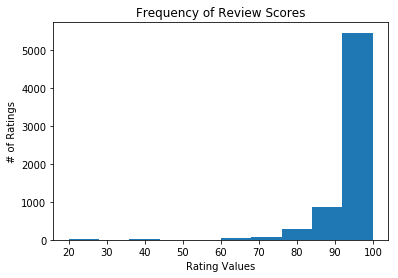

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(filtered_df['review_scores_rating'], bins=10)
plt.title('Frequency of Review Scores')
plt.xlabel('Rating Values')
plt.ylabel('# of Ratings')
plt.show()

### Correlation, Covariance, and Scatter Plots

I next wanted to see whether there was a relationship between the number of reviews and the availability of a certain place. My initial hypothesis was that the number of reviews would drive traffic towards that particular listing and the number of days of availability would likely be lower.

An initial glance at the covariance and correlation numbers however indicate a positive relationship, with availabilities rising with the number of reviews. Despite this having contradicted my previous hypothesis, the degree of correlation is still very low, 0.076 for 30 day availability and rising to 0.25 for 365 day availability.

Further regression and confidence interval testing could be conducted to test the relationship.

In [22]:
avails = ['number_of_reviews','availability_30','availability_60','availability_90','availability_365']
filtered_df[avails].cov()

,number_of_reviews,availability_30,availability_60,availability_90,availability_365
number_of_reviews,2920.842855,36.806662,167.071886,350.233407,1789.972737
availability_30,36.806662,79.512775,154.397444,225.189157,577.481994
availability_60,167.071886,154.397444,362.066191,559.026453,1476.187556
availability_90,350.233407,225.189157,559.026453,938.298025,2640.572744
availability_365,1789.972737,577.481994,1476.187556,2640.572744,17917.265460


In [23]:
filtered_df[avails].corr()

,number_of_reviews,availability_30,availability_60,availability_90,availability_365
number_of_reviews,1.000000,0.076375,0.162463,0.211560,0.247432
availability_30,0.076375,1.000000,0.909971,0.824439,0.483820
availability_60,0.162463,0.909971,1.000000,0.959109,0.579578
availability_90,0.211560,0.824439,0.959109,1.000000,0.644009
availability_365,0.247432,0.483820,0.579578,0.644009,1.000000


I first learned to plot the scatter graph with matplotlab before utilizing the seaborn package for easier visualization of the confidence intervals.

In accordance with the low positive correlation values, there doesnt seem to be a very clear relationship at a first glance of the scatter plot.

The best fit lines created with the seaborn plots do show a stronger positive correlation as we move from 30 day availabilities to 365 day availabilities. **This stronger correlation should not be exaggerated however as there might not be a clear relationship between 30 and 365 day bookings due to seasonality and other factors.**

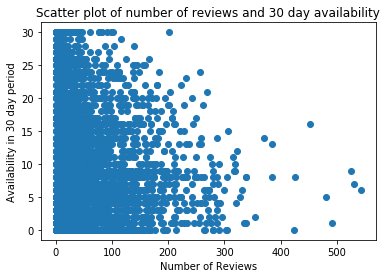

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(filtered_df['number_of_reviews'],filtered_df['availability_30'])
plt.title('Scatter plot of number of reviews and 30 day availability')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability in 30 day period')
plt.show()

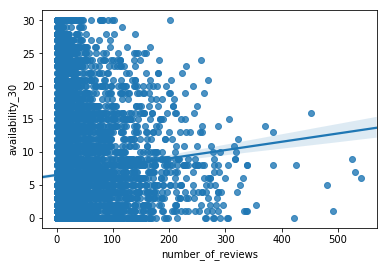

In [25]:
sns.regplot(filtered_df['number_of_reviews'],filtered_df['availability_30'],ci=95)

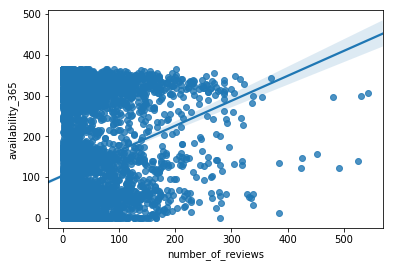

In [26]:
sns.regplot(filtered_df['number_of_reviews'],filtered_df['availability_365'],ci=95)

Just to consolidate my knowledge of how to identify relationships between variables, I chose an intuitive pair of variables in "accomodates" and "bedrooms" to look at. The correlation as expected was heavily positive at 0.73 and the resulting scatter plot tended towards the top right hand corner, fitting in with the expected relationship between these two variables.

In [27]:
filtered_df[['accommodates','bedrooms']].corr()

,accommodates,bedrooms
accommodates,1.000000,0.727765
bedrooms,0.727765,1.000000


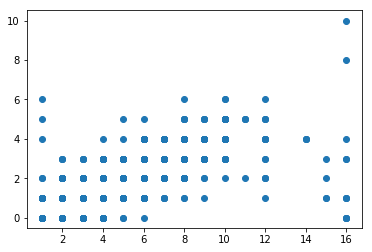

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(filtered_df['accommodates'],filtered_df['bedrooms'])
plt.show()

### Multiple Linear Regression
To test the capability of other packages and to understand more about the relationship between multiple variables and 30 day availability, I used statsmodel.api to construct a simple multiple linear regression model.

<span style = "color:red">Important</span><br>
While this is certainly a preliminary model, it would seem that the factors chosen below are not very predictive of 30 day availability, with an R-squared value of only 0.025. As only purely numerical variables are included, the result would be much more accurate if we had been able to include nominal values as well such as the type of bed or the type of amenities.

To do so we would have to recode the appropriate labels. For "type_of_bed" for example, a different numerical value can be given to each type of bed: 1 for proper bed and 2 for pull out sofa.

For amenities, it would be difficult to account for the different kinds of amenities combinations available (tv and wifi vs. parking, wifi, and satellite tv). One possible solution would be to create a scoring system that rates these different amenities. It would be even more useful if these overall scores could be modified to fit the preferences of the individual customer.

In [31]:
y = filtered_df['availability_30']
X = filtered_df[['number_of_reviews','price','accommodates','bathrooms','bedrooms','beds','years_being_host','minimum_nights']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        availability_30   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     21.72
Date:                Tue, 20 Feb 2018   Prob (F-statistic):           5.99e-33
Time:                        12:35:07   Log-Likelihood:                -24152.
No. Observations:                6720   AIC:                         4.832e+04
Df Residuals:                    6711   BIC:                         4.838e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.8278      0.371     21.084      0.000       7.100       8.556
number_of_reviews     0.0151      0.002      7.385      0.000       0.011       0.019
price                 0.0027      0.000      6.404      0.000       0.002       0.004
accommodates          0.2481      0.102      2.443      0.015       0.049       0.447
bathrooms             0.6099      0.200      3.052      0.002       0.218       1.002
bedrooms             -1.2743      0.206     -6.189      0.000      -1.678      -0.871
beds                 -0.1636      0.185     -0.887      0.375      -0.525       0.198
years_being_host     -0.3612      0.057     -6.294      0.000      -0.474      -0.249
minimum_nights        0.0163      0.006      2.588      0.010       0.004       0.029
==============================================================================
Omnibus:                      995.957   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.680
Skew:                           1.153   Prob(JB):                         0.00
Kurtosis:                       3.250   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Boxplots

It seemed interesting to see where most of the reviews lie and a boxplot seemed to be an intuitive method of displaying these figures side by side. 

While a single boxplot was simple and required the same syntax as some of the above graphs, trying to plot all the reviews side by side as subplots was challenging. It was through looping through an array of review column headings and creating a subplot/boxplot for each one that this was eventually created. 

The box plots show that most of the reviews tend within the 8-10 range, with almost all of accuracy, checkin, and communication ratings coming in at 10. 

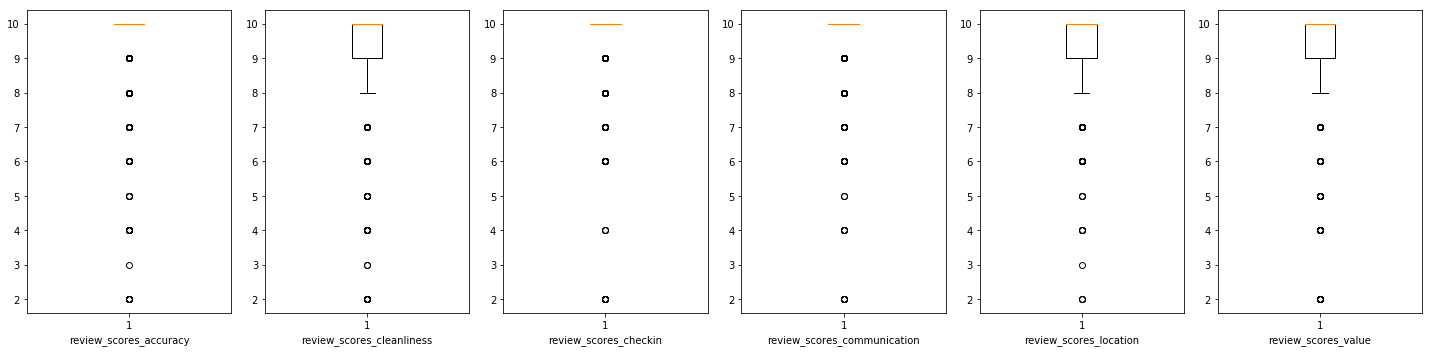

In [122]:
#array of different reviews
reviews = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
fig = plt.figure(figsize=(20,5))

#iterate over all reviews, while keeping a counter for the position where we're at to determine subplot position
for i, review in enumerate(reviews):
    plt.subplot(1,len(reviews),i+1)
    plt.boxplot(filtered_df[review])
    plt.xlabel(review)
    
#format graphs to be more spaced out and display
plt.tight_layout()
plt.show()

### Histograms
For nominal values such as "neighbourhood", the best way to compare across all the unique values within this variable is through a bar graph.

Through the histogram, we can see that the highest number of listings by far is the Mission district. Meanwhile, Bernal Heights, Richmond District, SoMa, and NOPA are the next densest areas for listings.

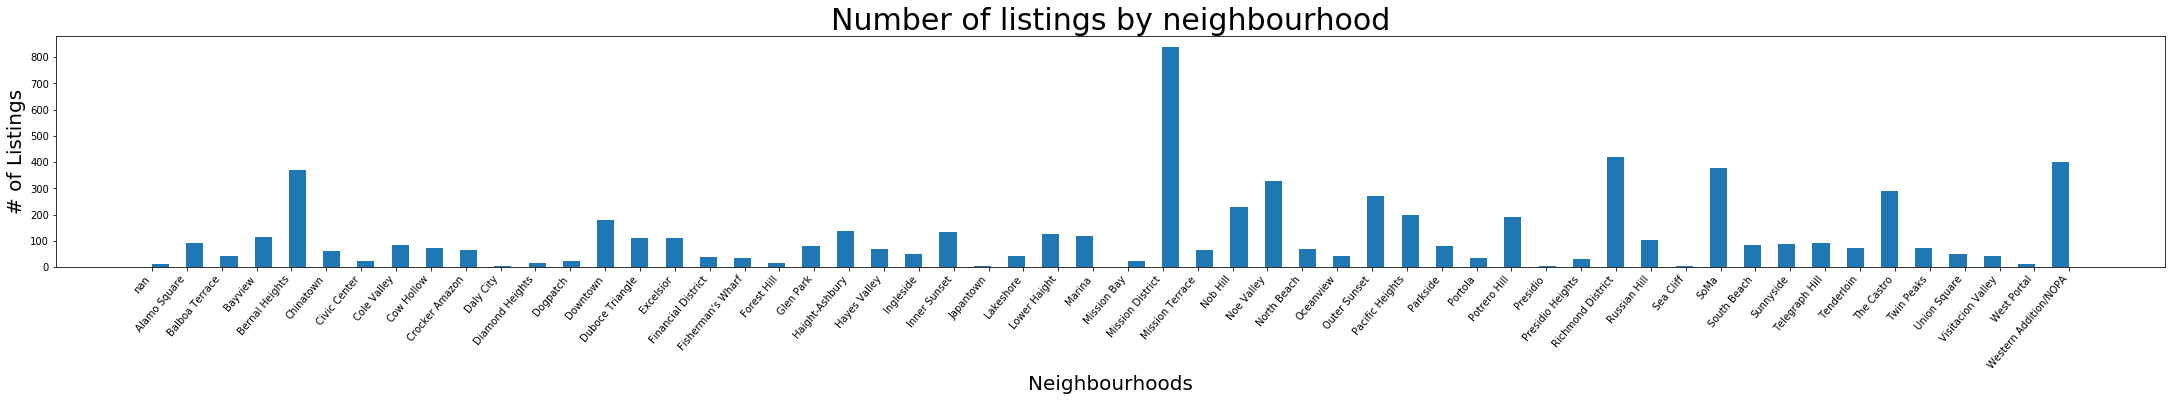

In [119]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)
ax.hist(filtered_df['neighbourhood'],bins=112)

plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.tight_layout()
plt.title('Number of listings by neighbourhood',fontdict = {'fontsize':30})
plt.xlabel('Neighbourhoods',fontdict={'fontsize':20})
plt.ylabel('# of Listings',fontdict={'fontsize':20})
plt.show()

It is also possible to do a deeper dive into any particular district of type of housing by specifying the data frame from which to read. In the below case, we take a deeper look at the Mission District with regards to the relationship between 'bedrooms' and 'price'. 

While there is a positive correlation that could have been predicted, there are a few outliers in the 1 and 2 bedroom categories. These outliers could be easily explainable by them being "luxury" properties that command the premium fee.

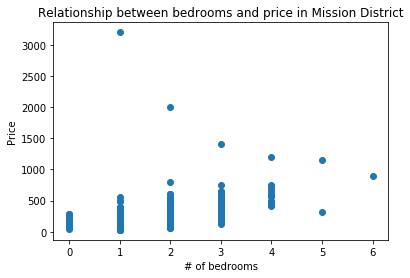

In [135]:
mission = filtered_df[filtered_df['neighbourhood']=='Mission District']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(mission['bedrooms'],mission['price'])
plt.title('Relationship between bedrooms and price in Mission District')
plt.xlabel('# of bedrooms')
plt.ylabel('Price')
plt.show()

In [152]:
filtered_df.to_csv('new_filtered_data.csv')

## To be continued in Part 2: Machine Learning Models

Upon the construction of some statistical models and graphs, it would seem that the data hasn't actually been fully cleaned yet. A more thorough recoding of the data, including categorizing columns and cleaning under represented data would make the data much more usable for machine learning models.